In [1]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x = tf.placeholder(
    shape = [None, 28, 28, 1],
    dtype=tf.float32
)
y = tf.placeholder(
    shape = [None, 10],
    dtype=tf.float32
)

In [3]:
def conv_module(x):
    conv1_3 = tf.layers.conv2d(
          inputs=x,
          filters=4,
          kernel_size=[1, 3],
          strides=(1, 1),
          padding="same",
          activation=tf.nn.relu
    )
    conv3_1 = tf.layers.conv2d(
          inputs=x,
          filters=4,
          kernel_size=[3, 1],
          strides=(1, 1),
          padding="same",
          activation=tf.nn.relu
    )
    conv1_3_dilated_2 = tf.layers.conv2d(
          dilation_rate=(1,2),
          inputs=x,
          filters=4,
          kernel_size=[1, 3],
          strides=(1, 1),
          padding="same",
          activation=tf.nn.relu
    )
    conv3_1_dilated_2 = tf.layers.conv2d(
          dilation_rate=(2,1),
          inputs=x,
          filters=4,
          kernel_size=[3, 1],
          strides=(1, 1),
          padding="same",
          activation=tf.nn.relu
    )
    conv1_3_dilated_3 = tf.layers.conv2d(
          dilation_rate=(1,3),
          inputs=x,
          filters=4,
          kernel_size=[1, 3],
          strides=(1, 1),
          padding="same",
          activation=tf.nn.relu
    )
    conv3_1_dilated_3 = tf.layers.conv2d(
          dilation_rate=(3,1),
          inputs=x,
          filters=4,
          kernel_size=[3, 1],
          strides=(1, 1),
          padding="same",
          activation=tf.nn.relu
    )
    conv1_3_dilated_4 = tf.layers.conv2d(
          dilation_rate=(1,4),
          inputs=x,
          filters=4,
          kernel_size=[1, 3],
          strides=(1, 1),
          padding="same",
          activation=tf.nn.relu
    )
    conv3_1_dilated_4 = tf.layers.conv2d(
          dilation_rate=(4,1),
          inputs=x,
          filters=4,
          kernel_size=[3, 1],
          strides=(1, 1),
          padding="same",
          activation=tf.nn.relu
    )
    out = tf.concat(
        [
            conv1_3,
            conv3_1,
            conv1_3_dilated_2,
            conv3_1_dilated_2,
            conv1_3_dilated_3,
            conv3_1_dilated_3,
            conv1_3_dilated_4,
            conv3_1_dilated_4,
        ],
        axis=3
    )
    return out

In [4]:
def conv_module_small(x):
    conv1_3 = tf.layers.conv2d(
          inputs=x,
          filters=16,
          kernel_size=[1, 3],
          strides=(1, 1),
          padding="same",
          activation=tf.nn.relu
    )
    conv3_1 = tf.layers.conv2d(
          inputs=x,
          filters=16,
          kernel_size=[3, 1],
          strides=(1, 1),
          padding="same",
          activation=tf.nn.relu
    )
    conv1_3_dilated_2 = tf.layers.conv2d(
          dilation_rate=(1,2),
          inputs=x,
          filters=16,
          kernel_size=[1, 3],
          strides=(1, 1),
          padding="same",
          activation=tf.nn.relu
    )
    conv3_1_dilated_2 = tf.layers.conv2d(
          dilation_rate=(2,1),
          inputs=x,
          filters=16,
          kernel_size=[3, 1],
          strides=(1, 1),
          padding="same",
          activation=tf.nn.relu
    )
    out = tf.concat(
        [
            conv1_3,
            conv3_1,
            conv1_3_dilated_2,
            conv3_1_dilated_2,
        ],
        axis=3
    )
    return out

In [5]:
conv_1_1 = conv_module(x)
conv_1_2 = conv_module(conv_1_1)

In [6]:
pool1 = tf.layers.max_pooling2d(
    inputs=conv_1_2, 
    pool_size=[3, 3],
    strides=2,
    padding='same'
)

In [7]:
pool1

<tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

In [8]:
conv_2_1 = conv_module(pool1)
conv_2_2 = conv_module(conv_2_1)

In [9]:
pool2 = tf.layers.max_pooling2d(
    inputs=conv_2_2, 
    pool_size=[3, 3],
    strides=2,
    padding='valid'#'same'
)

In [10]:
pool2

<tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 6, 6, 32) dtype=float32>

In [11]:
conv_3_1 = conv_module(pool2)
conv_3_2 = conv_module(conv_3_1)

In [12]:
pool3 = tf.layers.max_pooling2d(
    inputs=conv_3_2, 
    pool_size=[3, 3],
    strides=2,
    padding='same'
)

In [13]:
pool3

<tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(?, 3, 3, 32) dtype=float32>

In [14]:
conv_4_1 = conv_module_small(pool3)
conv_4_2 = conv_module_small(conv_4_1)

In [15]:
pool4 = tf.layers.max_pooling2d(
    inputs=conv_4_2, 
    pool_size=[3, 3],
    strides=1,
    padding='valid'
)

In [16]:
pool4

<tf.Tensor 'max_pooling2d_4/MaxPool:0' shape=(?, 1, 1, 64) dtype=float32>

In [17]:
conv_out = tf.reshape(pool4, [-1, 64])

In [18]:
conv_out

<tf.Tensor 'Reshape:0' shape=(?, 64) dtype=float32>

In [19]:
logits = tf.layers.dense(inputs=conv_out, units=10)
loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
)
softmax = tf.nn.softmax(logits)

In [20]:
train_op = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)

In [21]:
from sklearn.cross_validation import  train_test_split
# Набор данных MNIST – рукописные цифры
X, Y = [], []
with open('./../dz2/train.csv','r') as f:
    f.readline()
    for line in f:
        data = line.split(',')
        Y.append(int(data[0]))
        X.append([int(p) for p in data[1:]])
X = np.array(X)
Y = np.array(Y)
_X = np.reshape(X, newshape=(-1, 28,28, 1))
X_train, X_test, Y_train, Y_test = train_test_split(_X, Y, test_size=0.2)

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
def iter_data(batch_size, X, Y):
    batch_x, batch_y = [], []
    for x,y in zip(X,Y):
        labels = np.zeros(shape=(10,))
        labels[y]=1
        batch_x.append(x)
        batch_y.append(labels)
        if len(batch_x)< batch_size:
            yield np.array(batch_x), np.array(batch_y)
            batch_x, batch_y = [], []
    if batch_x:
        yield np.array(batch_x), np.array(batch_y)

In [26]:
with tf.Session() as sess:
    sess.run(
        tf.global_variables_initializer()
    )
    saver = tf.train.Saver()       
    saver.restore(sess, './dil_mnist_.model')
    for epoch in range(1):
        train_loss = []
        for batch_x, batch_y in iter_data(batch_size=128, X=X_train, Y=Y_train):
            _, _loss = sess.run(
                [train_op, loss],
                feed_dict={
                    x: batch_x,
                    y: batch_y
                }
            )
            train_loss.append(_loss)
        print('train', np.array(train_loss).mean())
        
        test_loss = []
        for batch_x, batch_y in iter_data(batch_size=128, X=X_test, Y=Y_test):
            _loss = sess.run(
                [loss],
                feed_dict={
                    x: batch_x,
                    y: batch_y
                }
            )
            test_loss.append(_loss)
        print('test', np.array(test_loss).mean())
    saver.save(sess, save_path='./dil_mnist_.model')

INFO:tensorflow:Restoring parameters from ./dil_mnist_.model
train 0.067759186
test 0.096963674


In [68]:
def sub_obj(_obj):
    shape = _obj.shape
    img = _obj.transpose(
        0,3,1,2
    ).reshape(
        shape[-1],shape[1],shape[2]
    ).reshape(
        int(shape[-1]/8), 8,shape[1], shape[2]
    ).transpose(
        0,2,1,3
    ).reshape(
        int(shape[-1]/8)*shape[1], shape[2]*8,
    )
    plt.figure(figsize=(20,10))
    plt.imshow(-img,interpolation='nearest', cmap='gray')
    plt.show()
    
def visualize(obj):
    with tf.Session() as sess:
        saver = tf.train.Saver()
        saver.restore(sess, './dil_mnist_.model')
        c1_1, c1_2, p1, c2_1, c2_2, p2, c3_1, c3_2, p3, c4, _softmax = sess.run(
            [
                conv_1_1,
                conv_1_2,
                pool1,
                conv_2_1,
                conv_2_2,
                pool2,
                conv_3_1,
                conv_3_2,
                pool3,
                conv_out,
                softmax,
            ],
            feed_dict={x: [obj]}
        )
        
    sub_obj(c1_1)
    sub_obj(c1_2)
    sub_obj(p1)
    
    sub_obj(c2_1)
    sub_obj(c2_2)
    sub_obj(p2)
    
    sub_obj(c3_1)
    sub_obj(c3_2)
    sub_obj(p3)
    
    shape = c4.shape
    print(shape)
    img = c4
    plt.figure(figsize=(30,10))
    plt.imshow(-img,interpolation='nearest', cmap='gray')
    plt.show()
    
    plt.figure(figsize=(10,10))
    plt.imshow(-_softmax,interpolation='nearest', cmap='gray')
    plt.show()

INFO:tensorflow:Restoring parameters from ./dil_mnist_.model


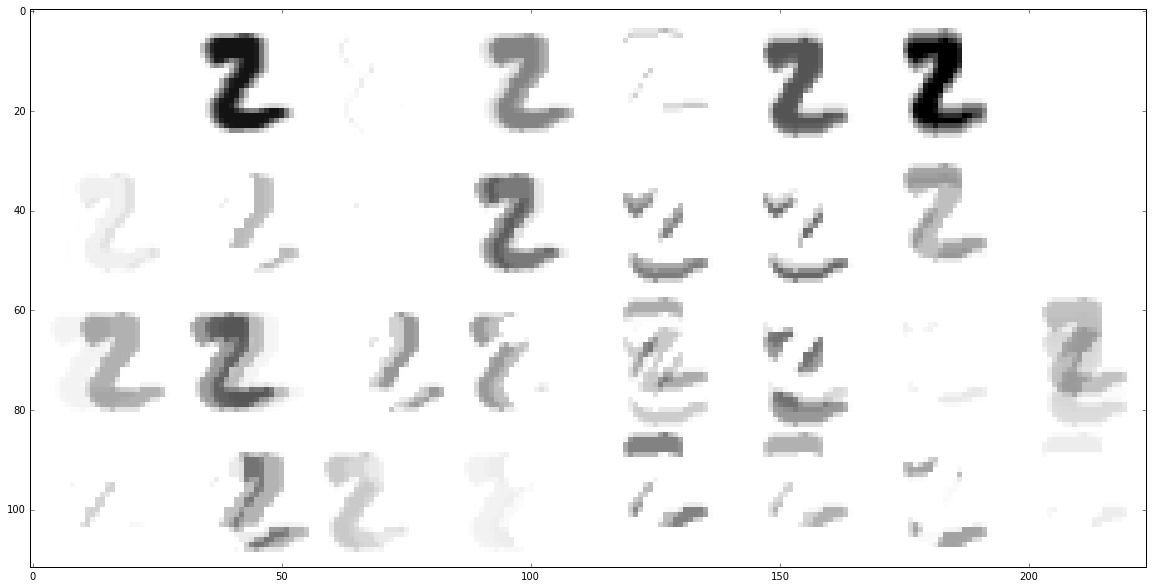

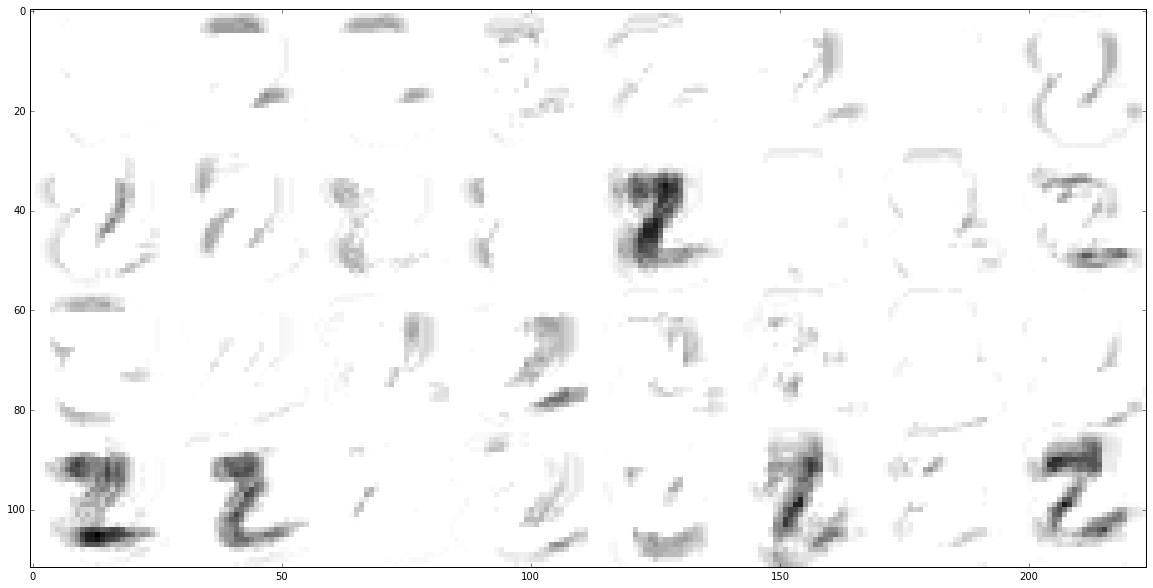

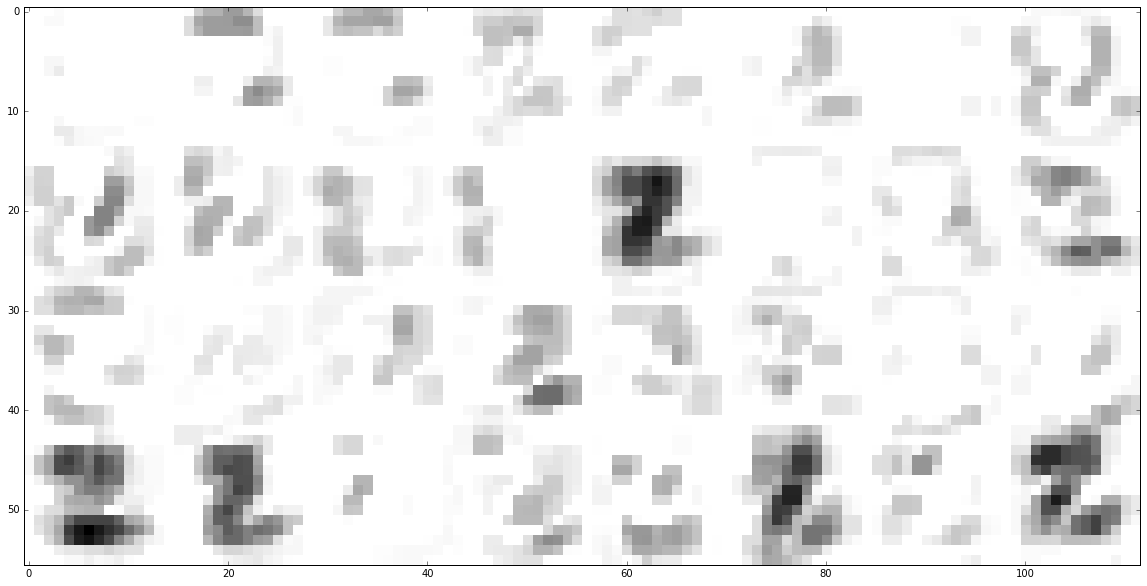

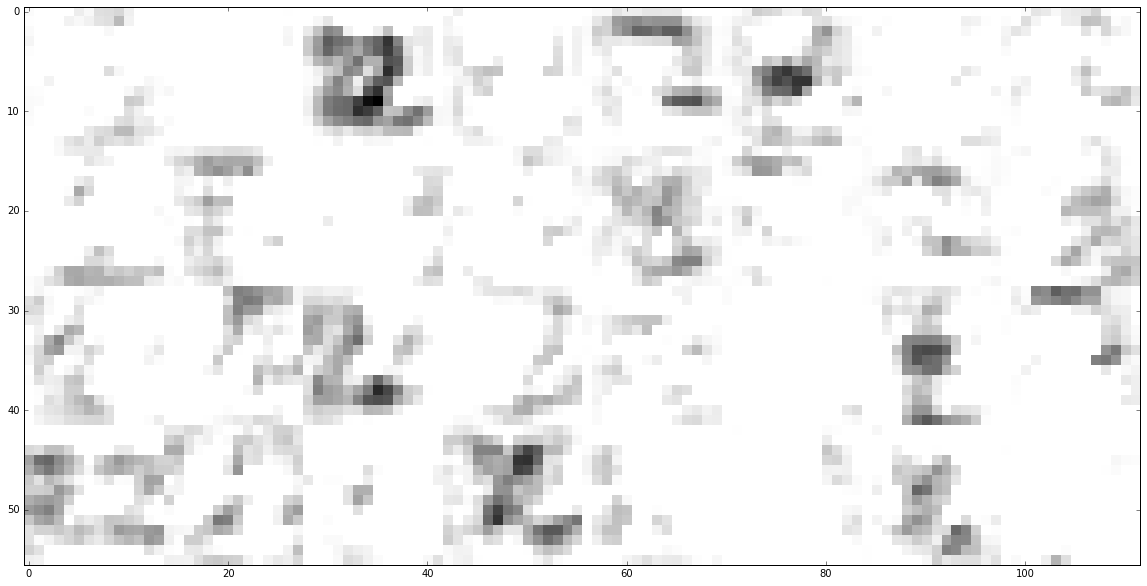

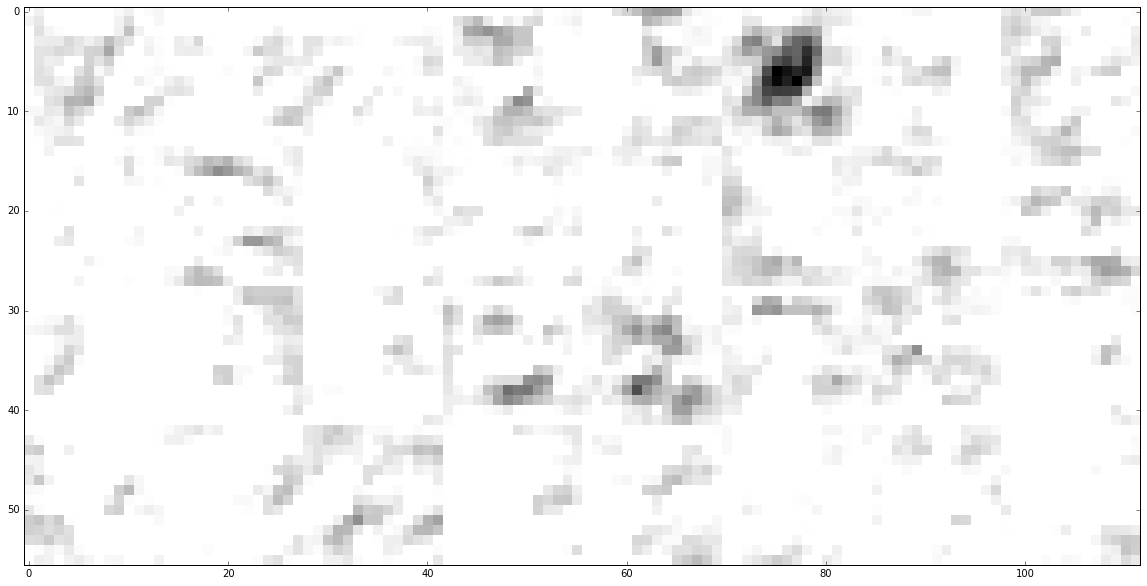

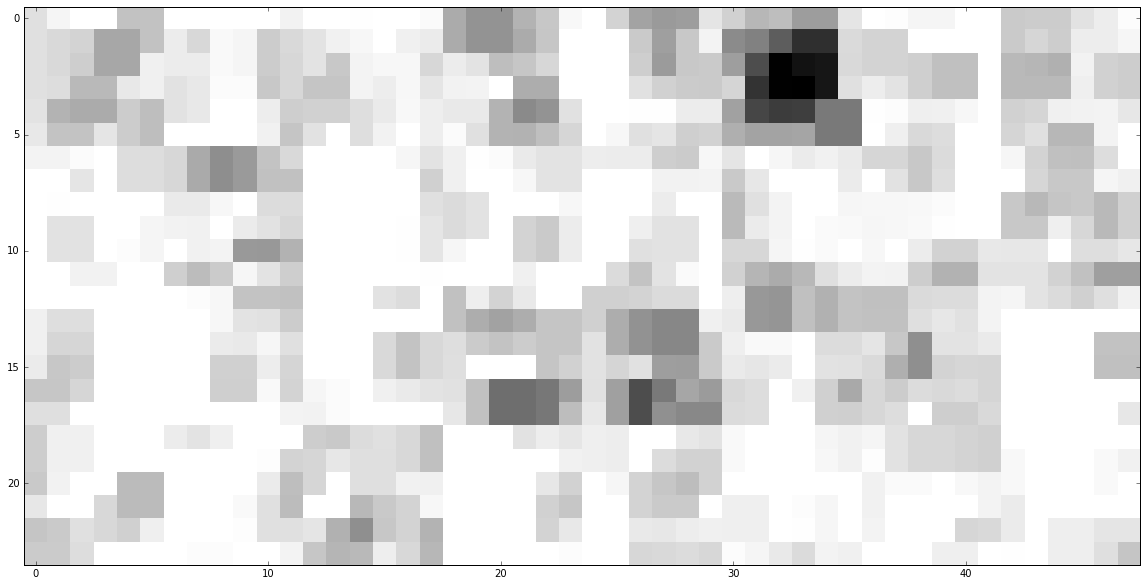

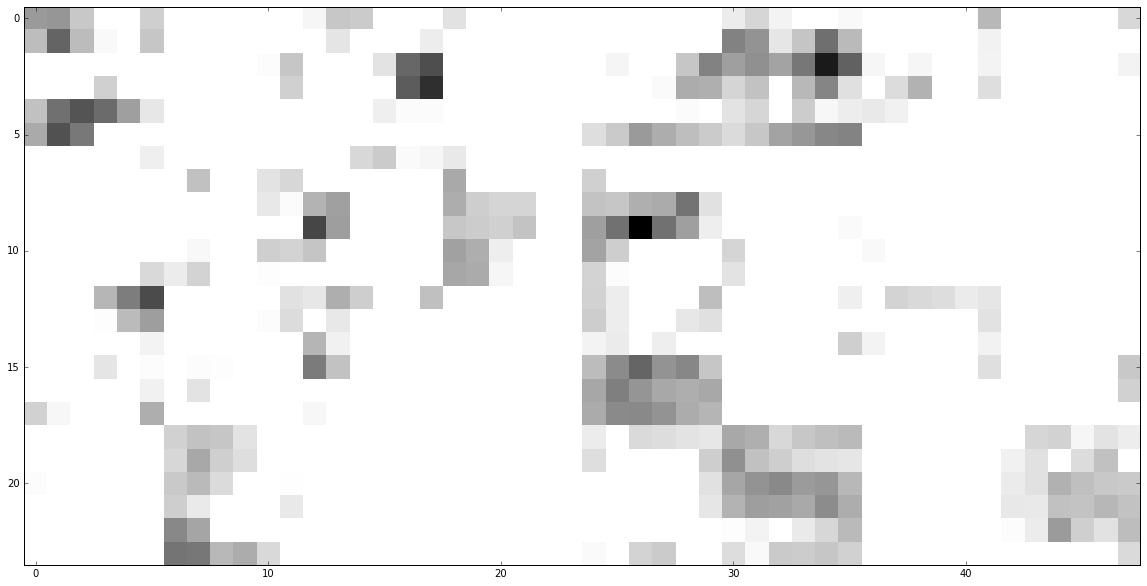

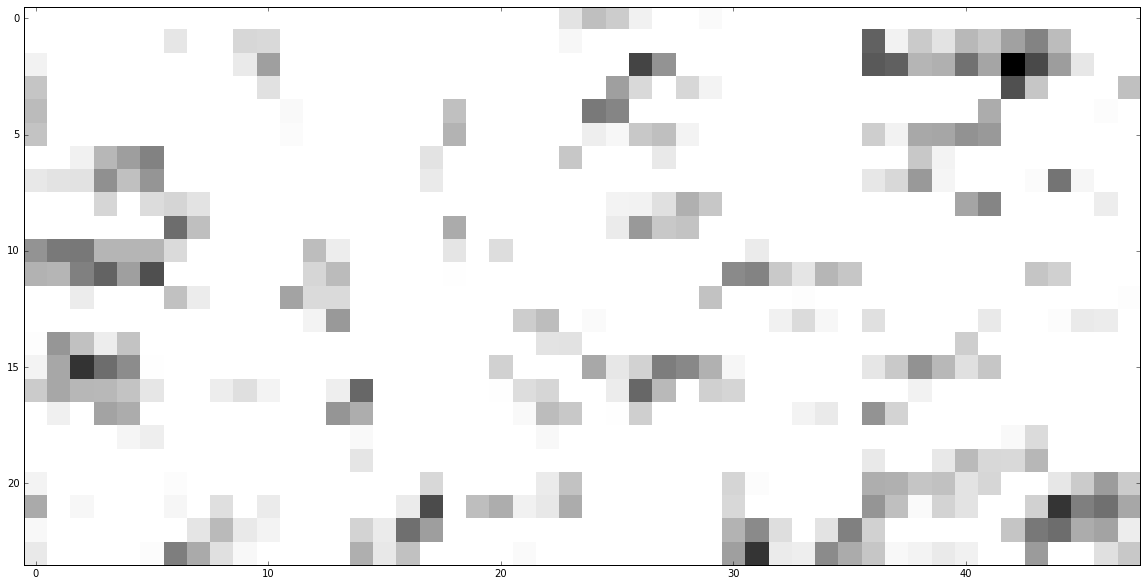

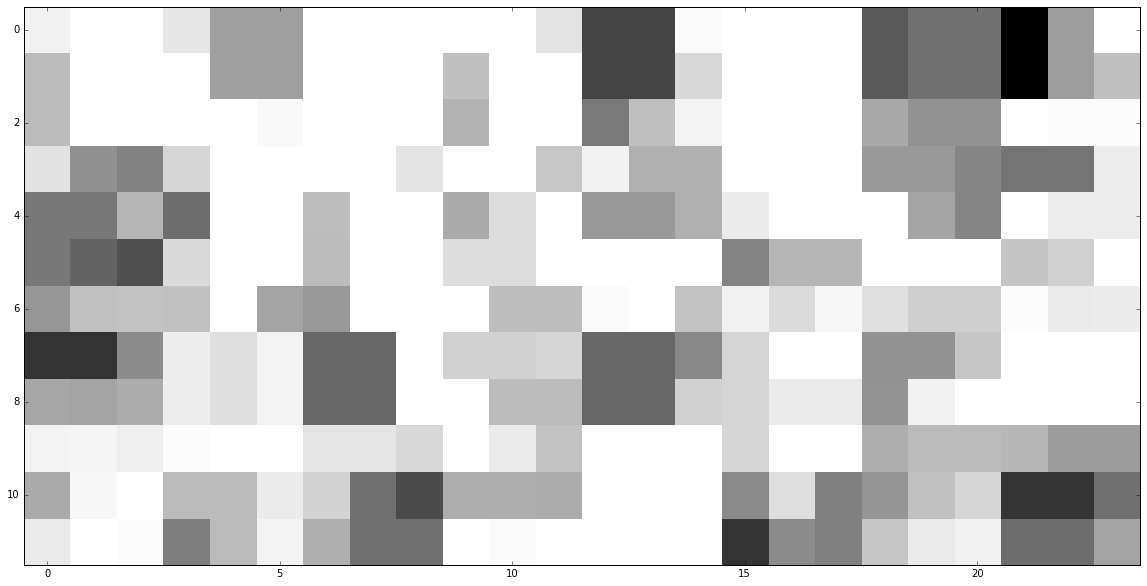

(1, 64)


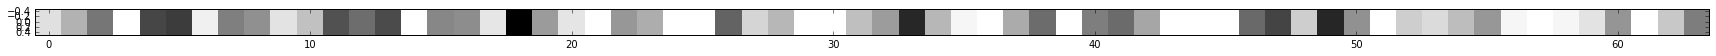

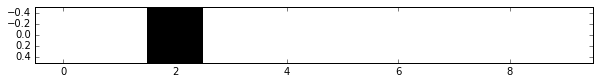

In [69]:
visualize(_X[16])

INFO:tensorflow:Restoring parameters from ./dil_mnist_.model


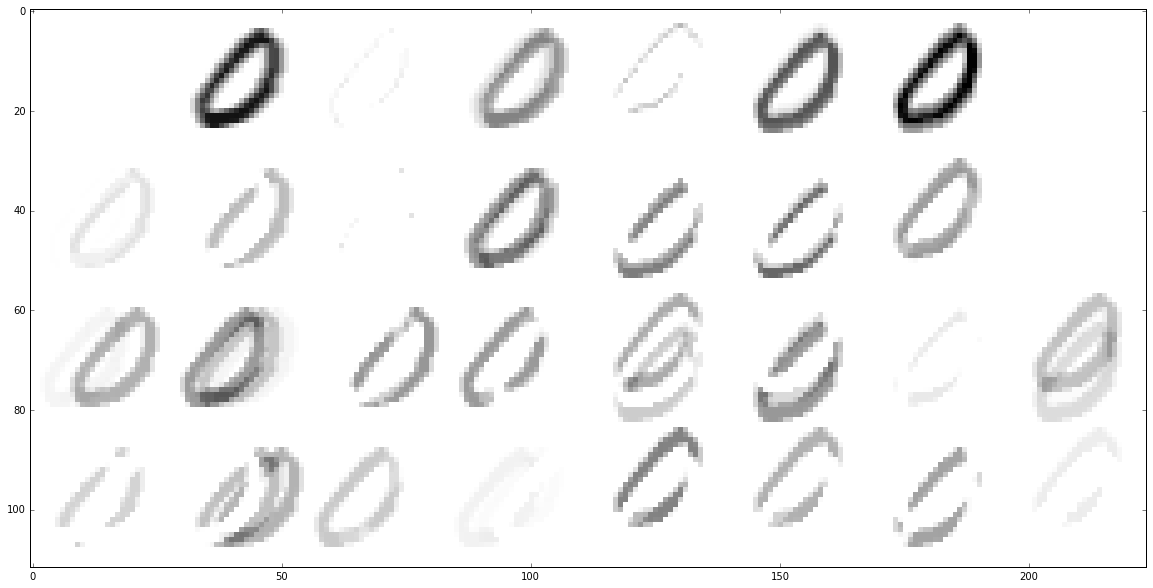

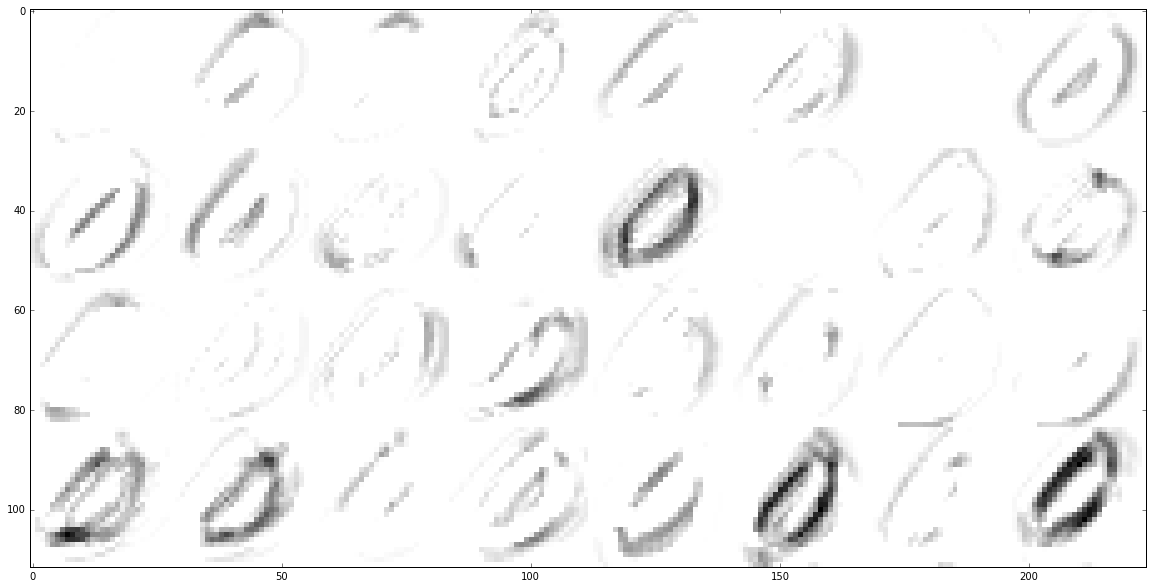

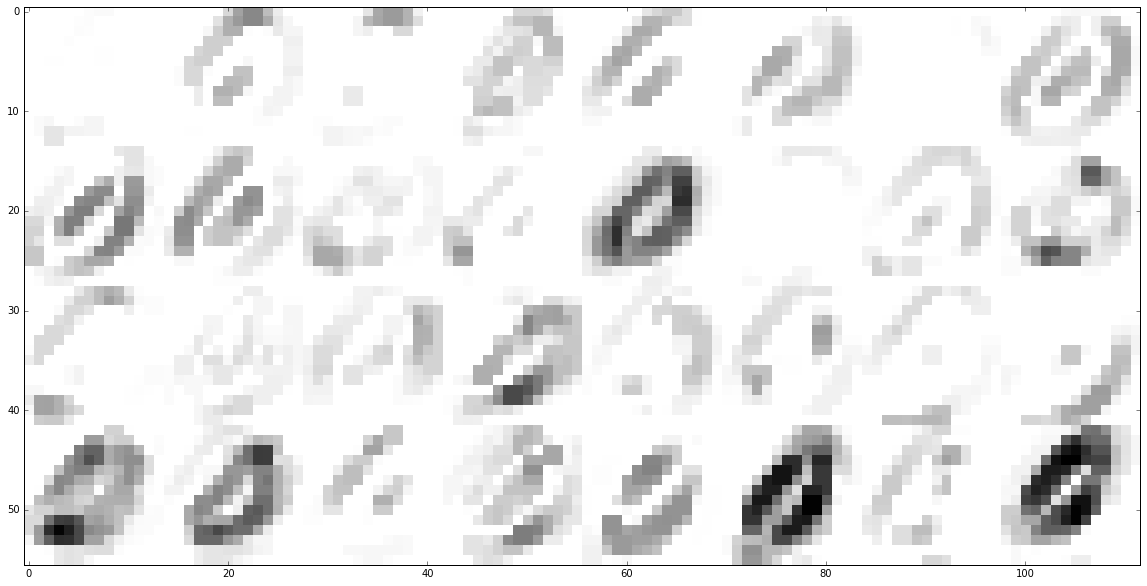

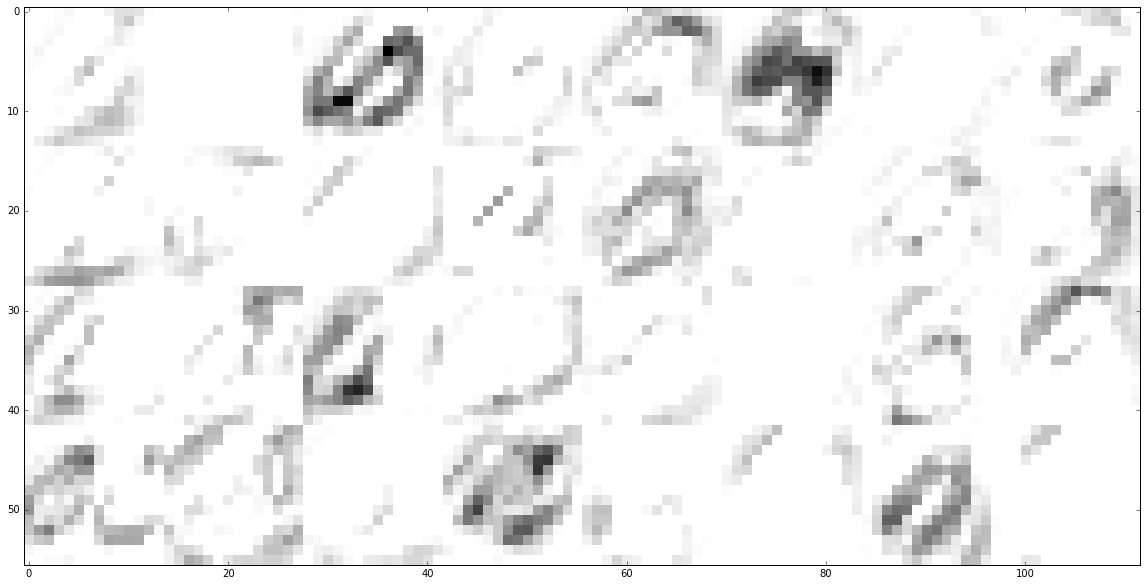

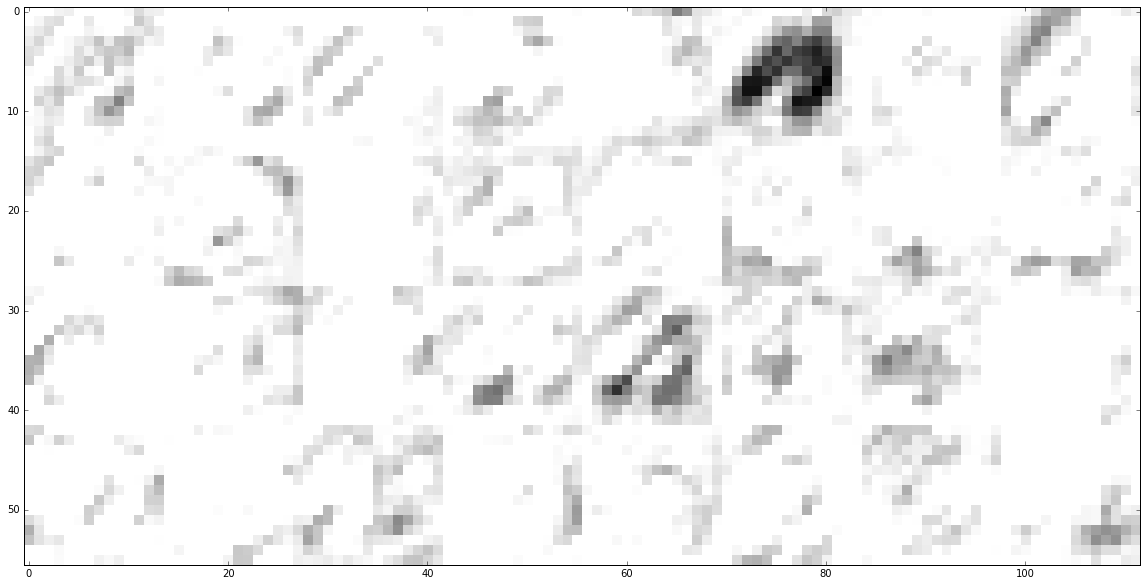

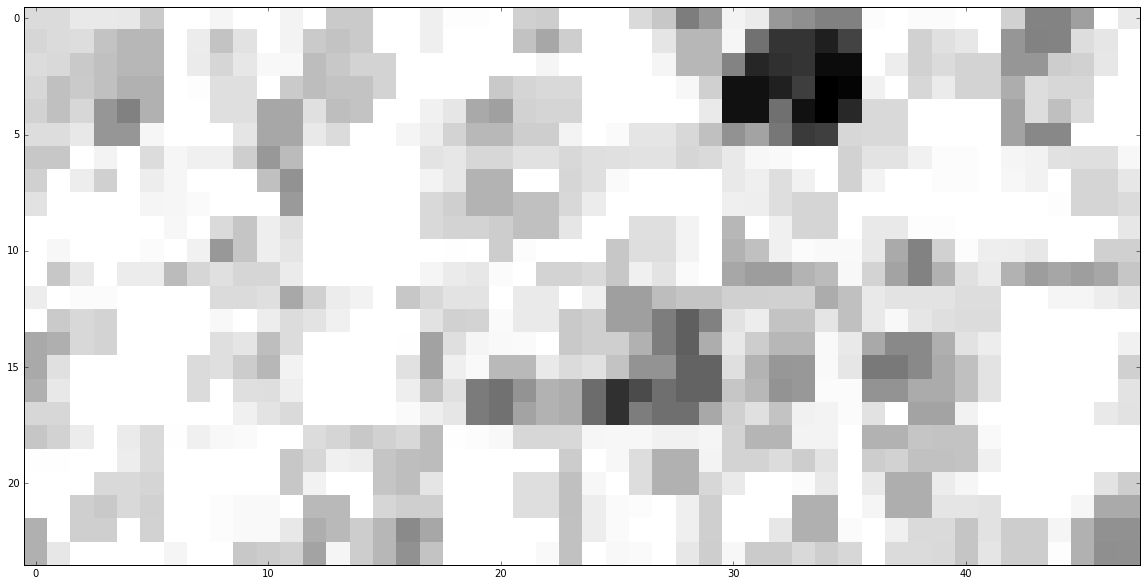

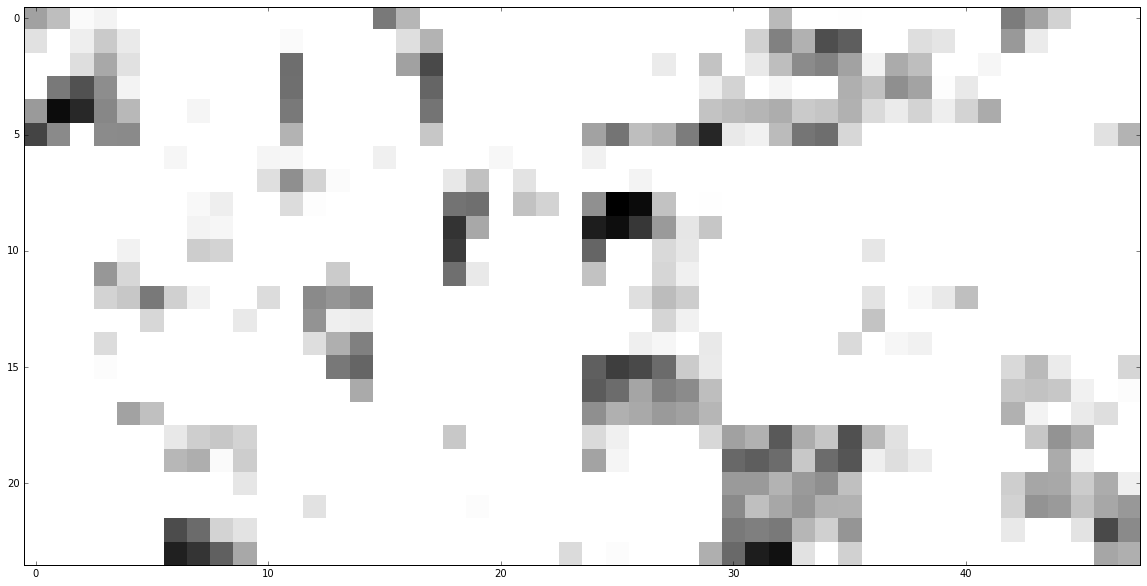

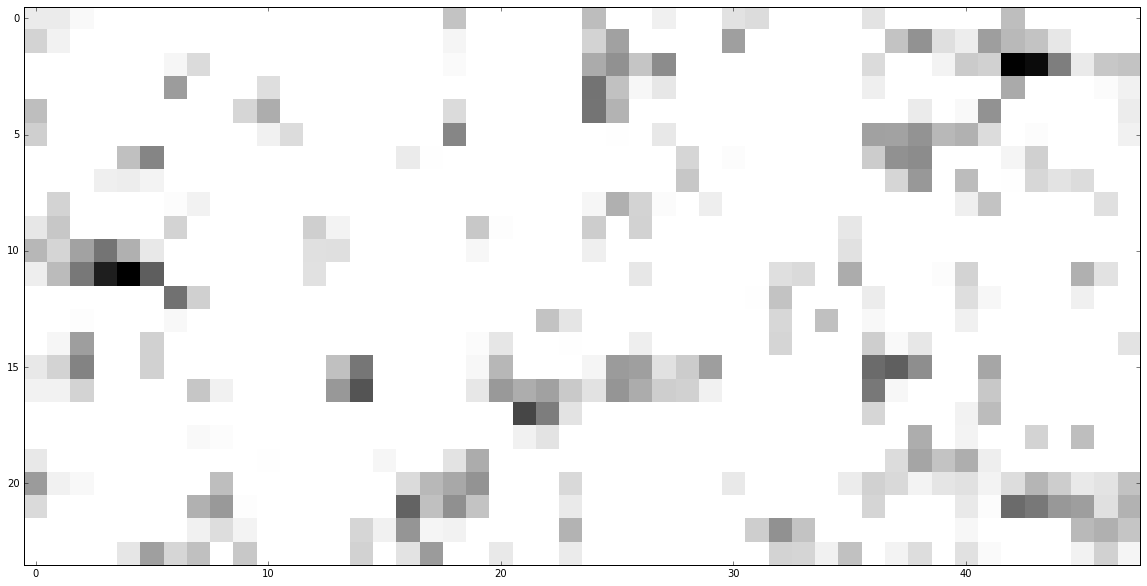

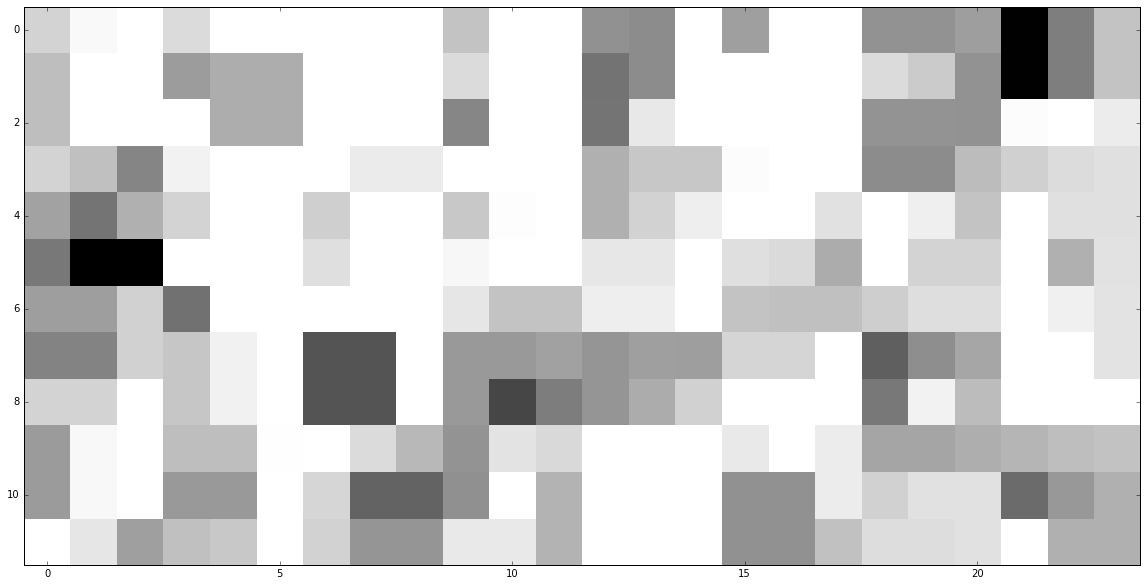

(1, 64)


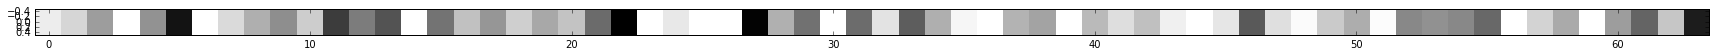

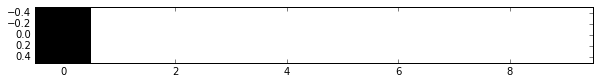

In [70]:
visualize(_X[17])

INFO:tensorflow:Restoring parameters from ./dil_mnist_.model


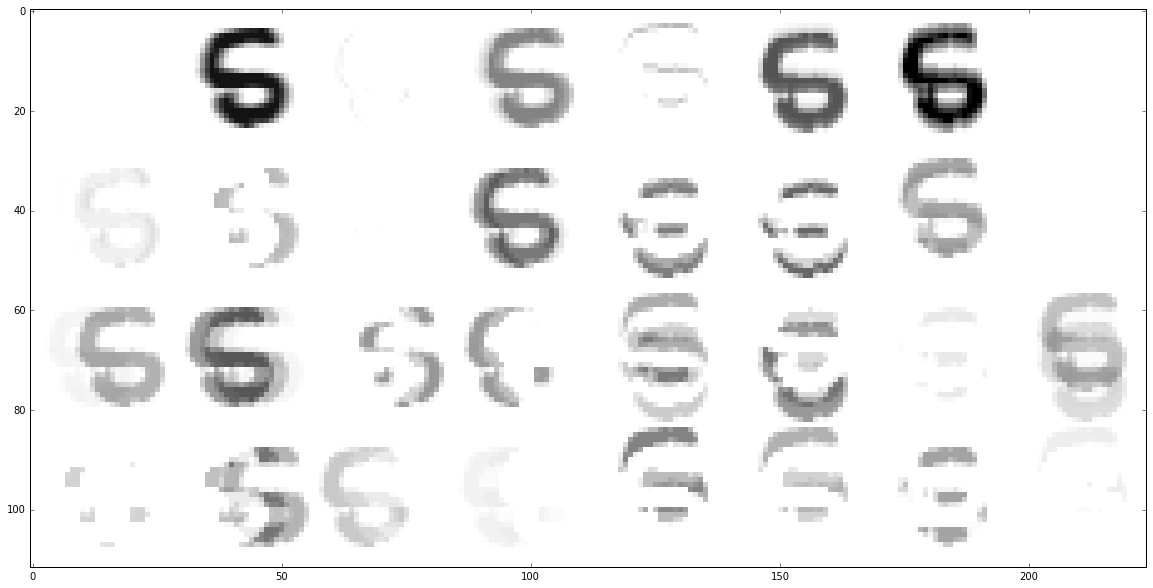

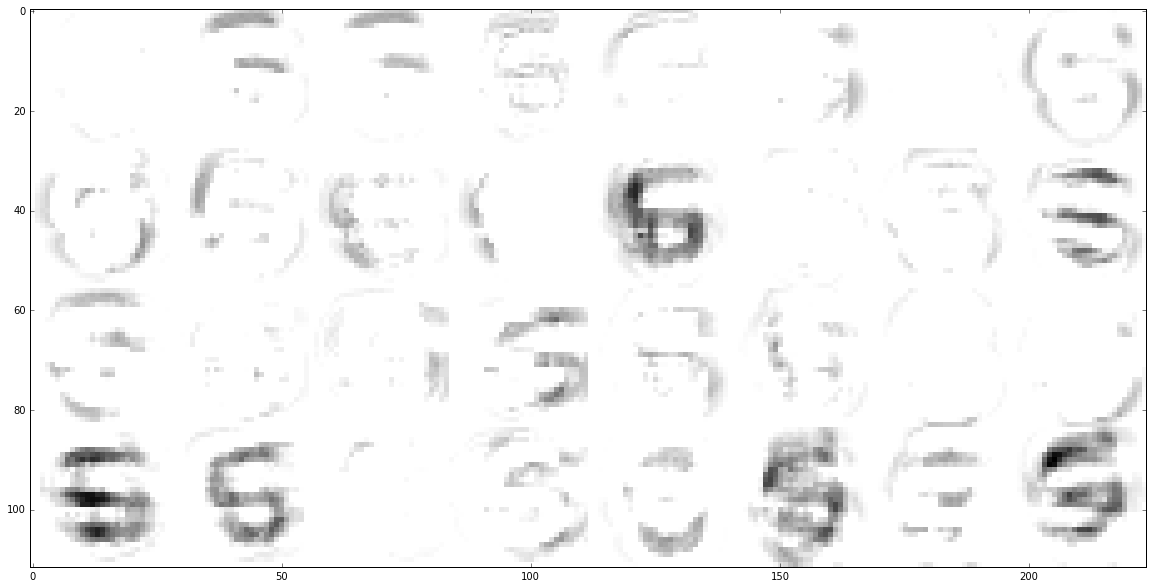

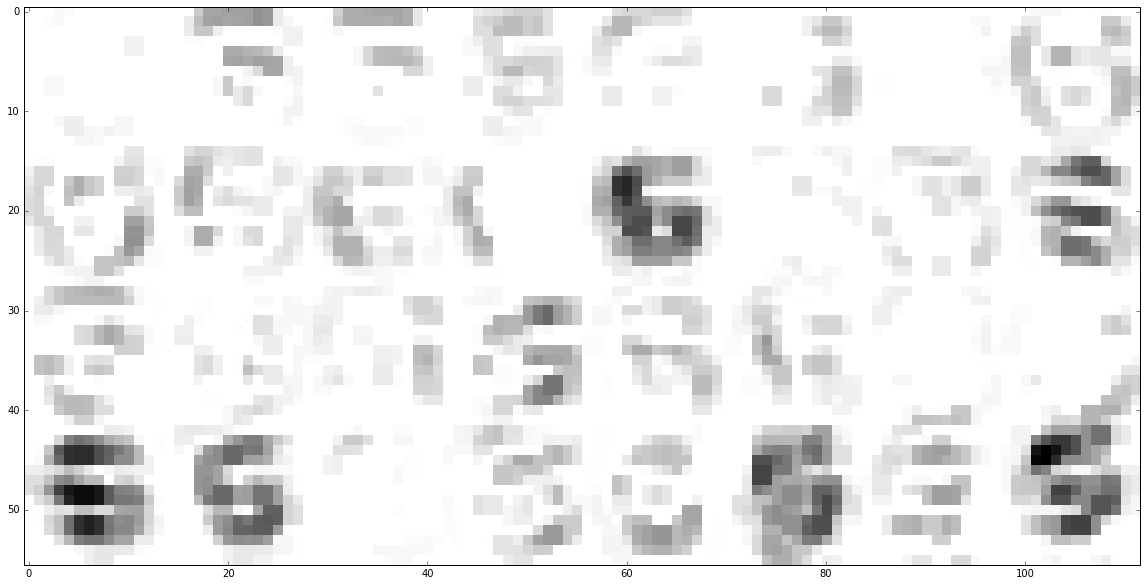

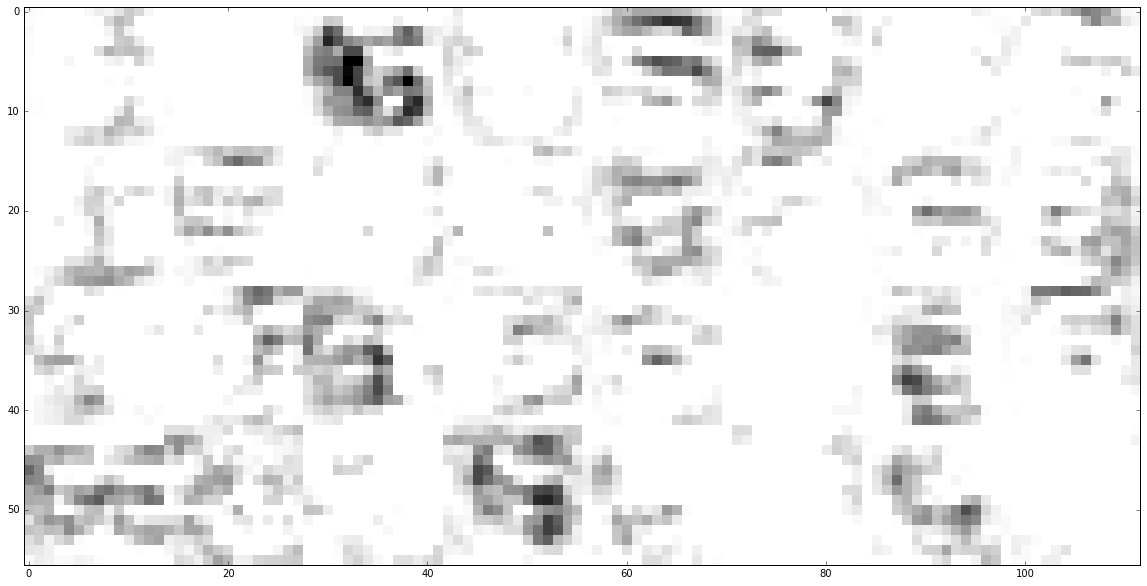

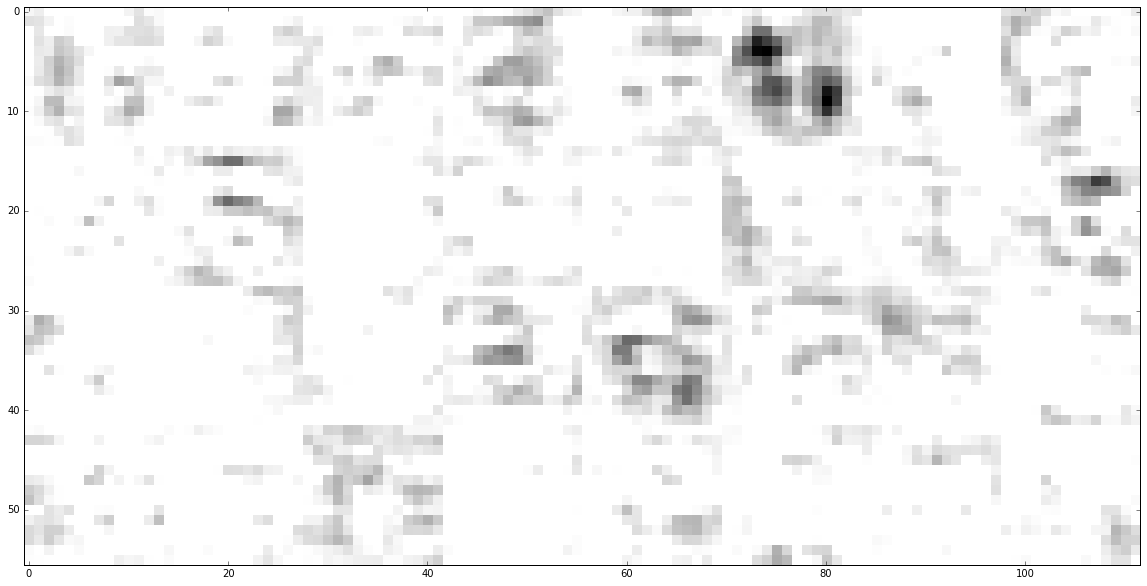

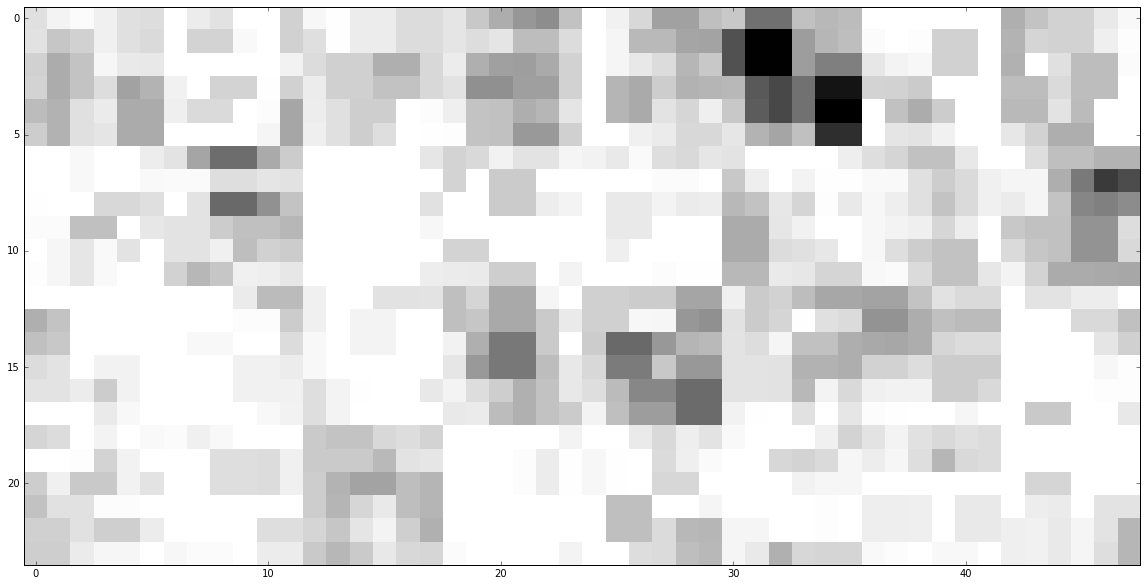

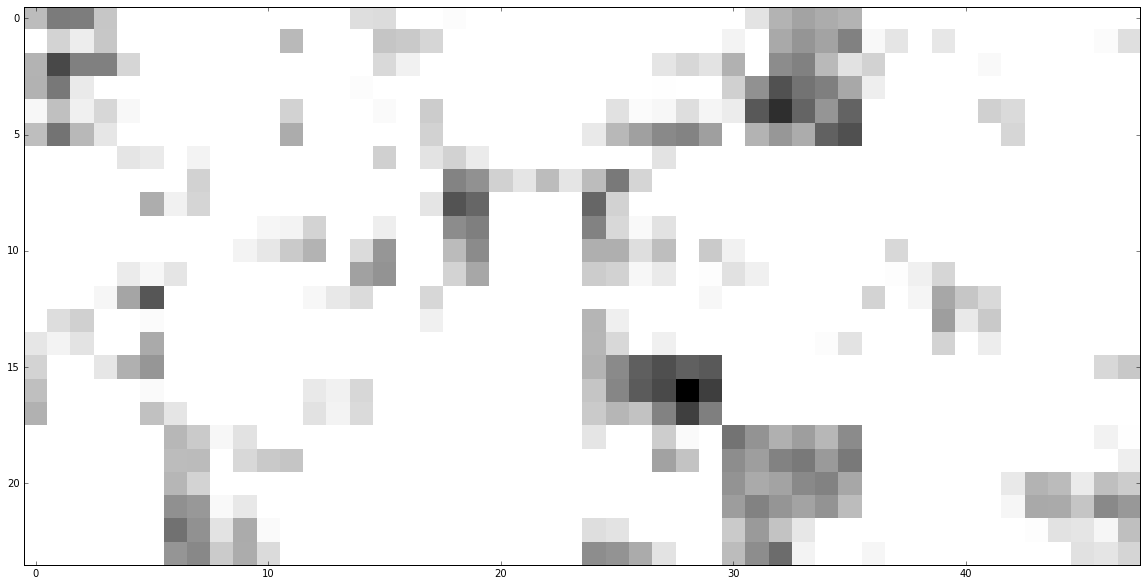

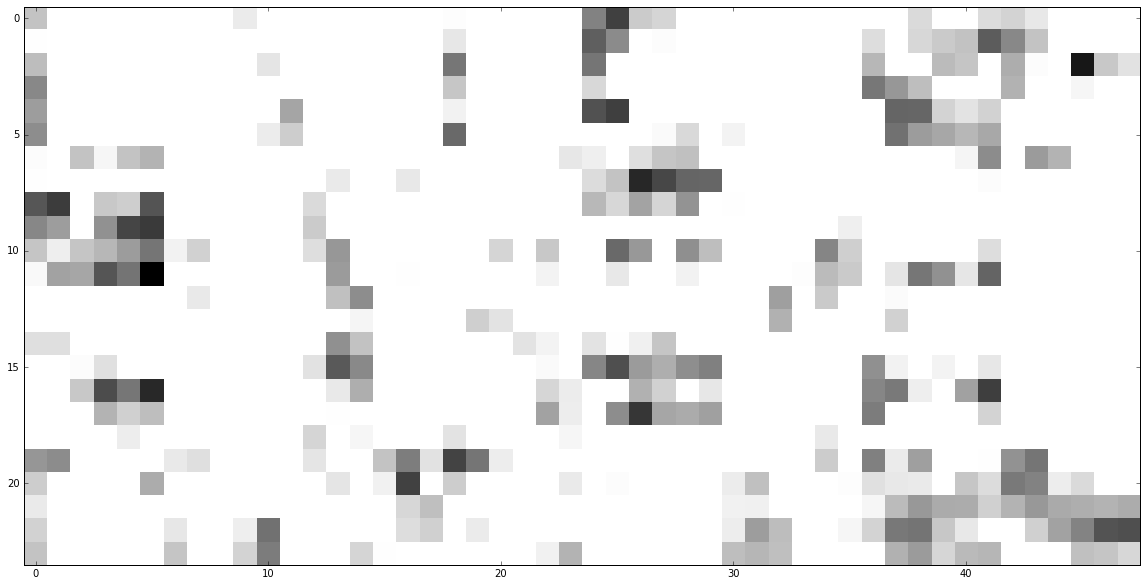

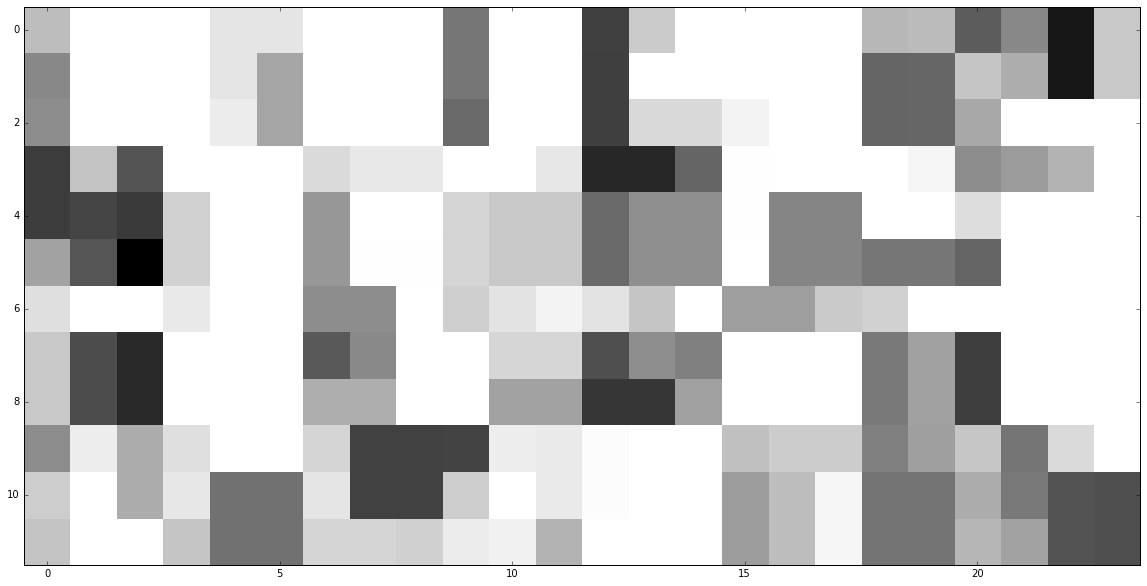

(1, 64)


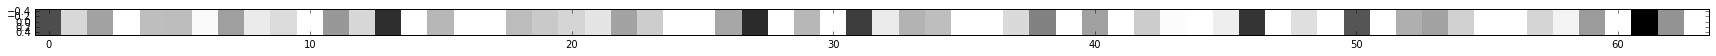

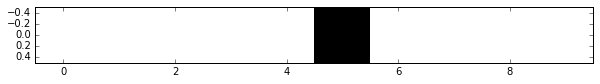

In [72]:
visualize(_X[19])

INFO:tensorflow:Restoring parameters from ./dil_mnist_.model


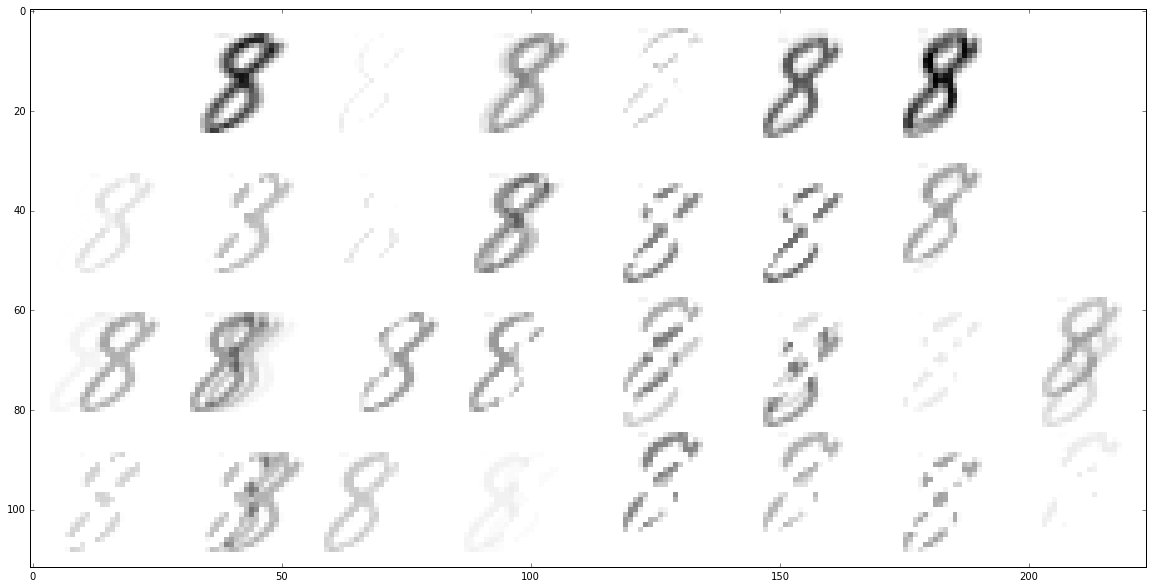

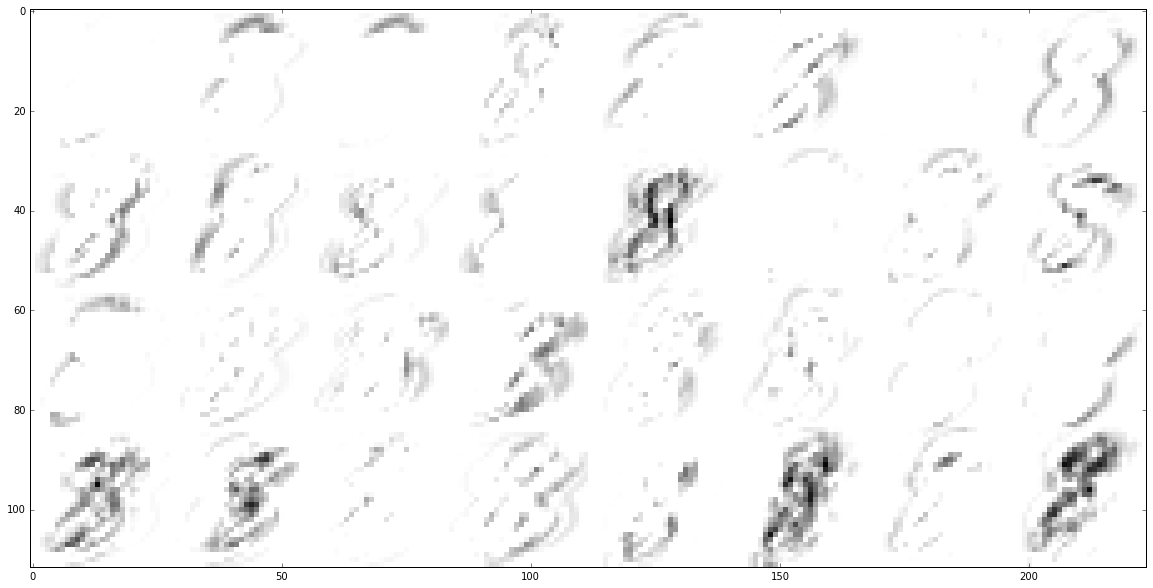

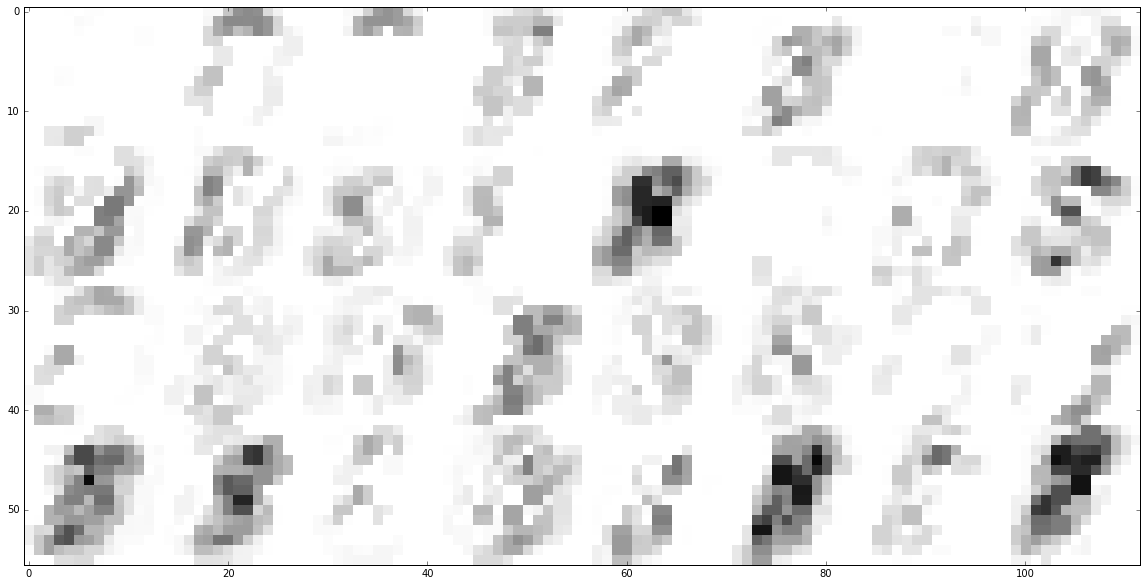

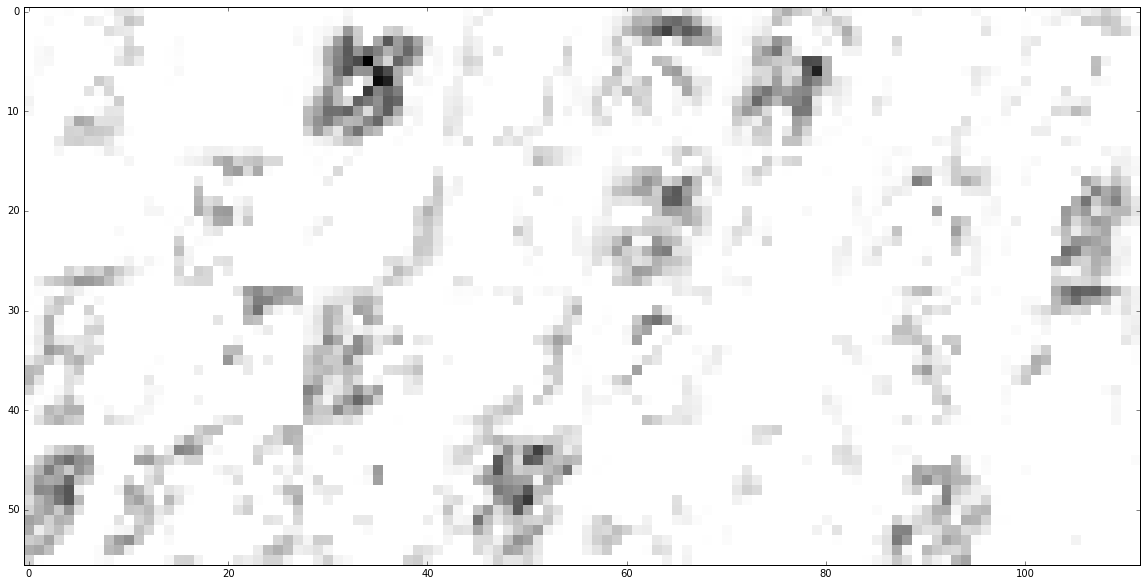

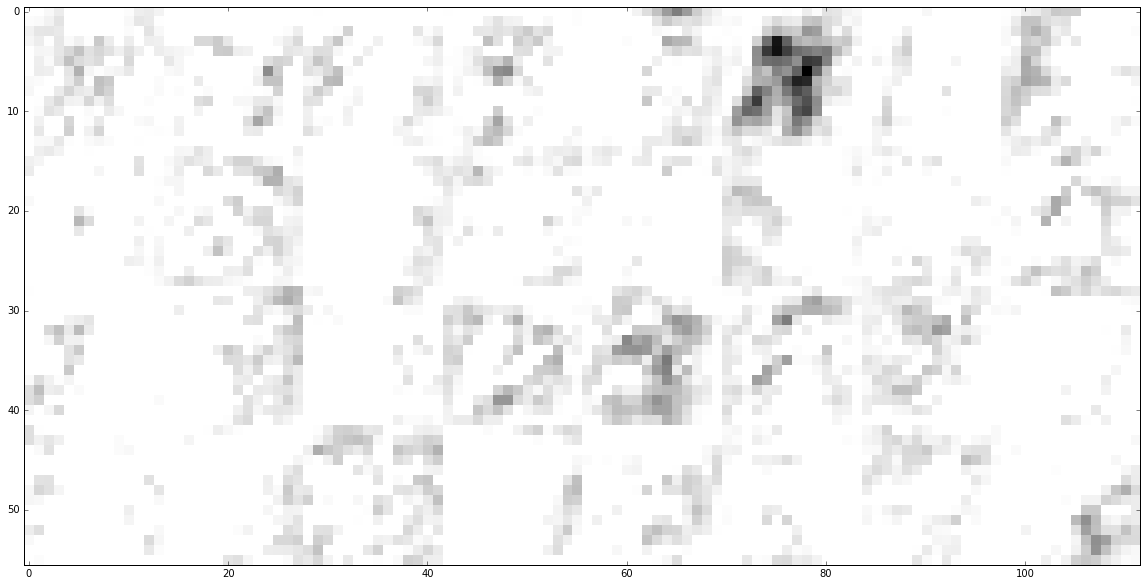

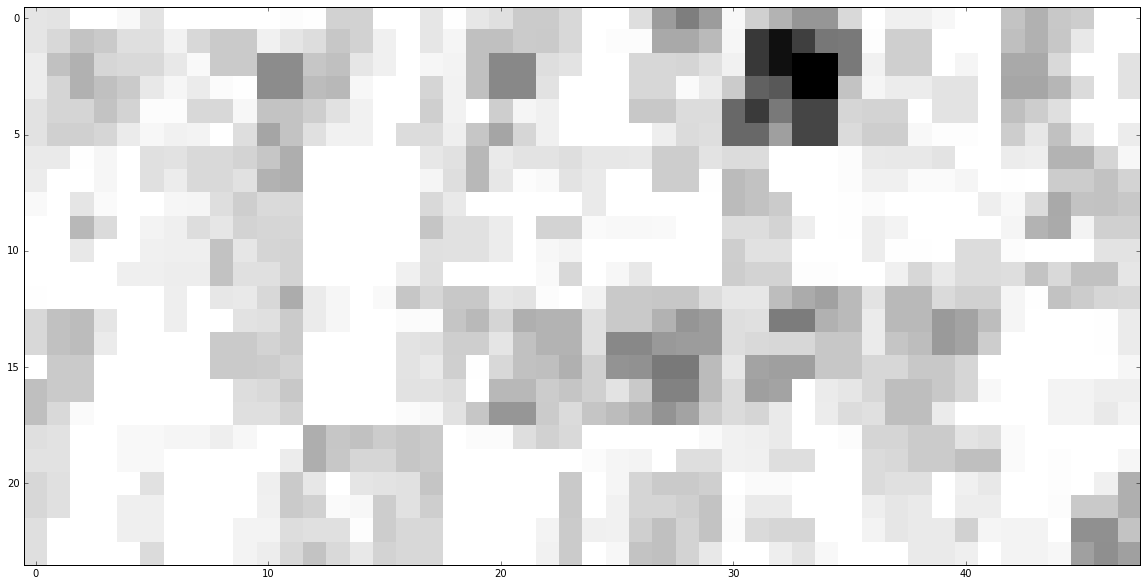

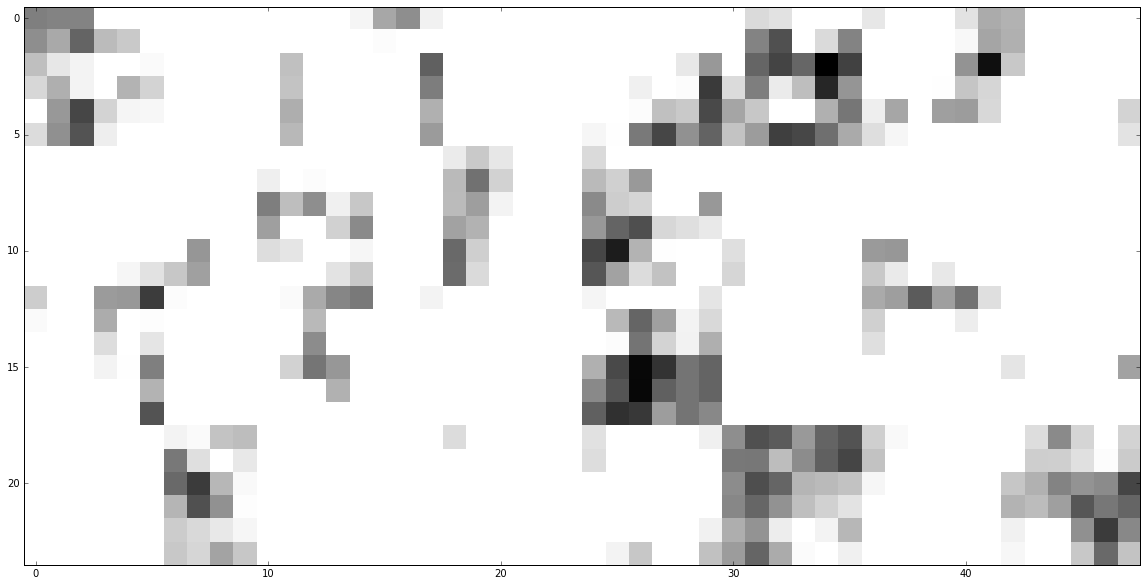

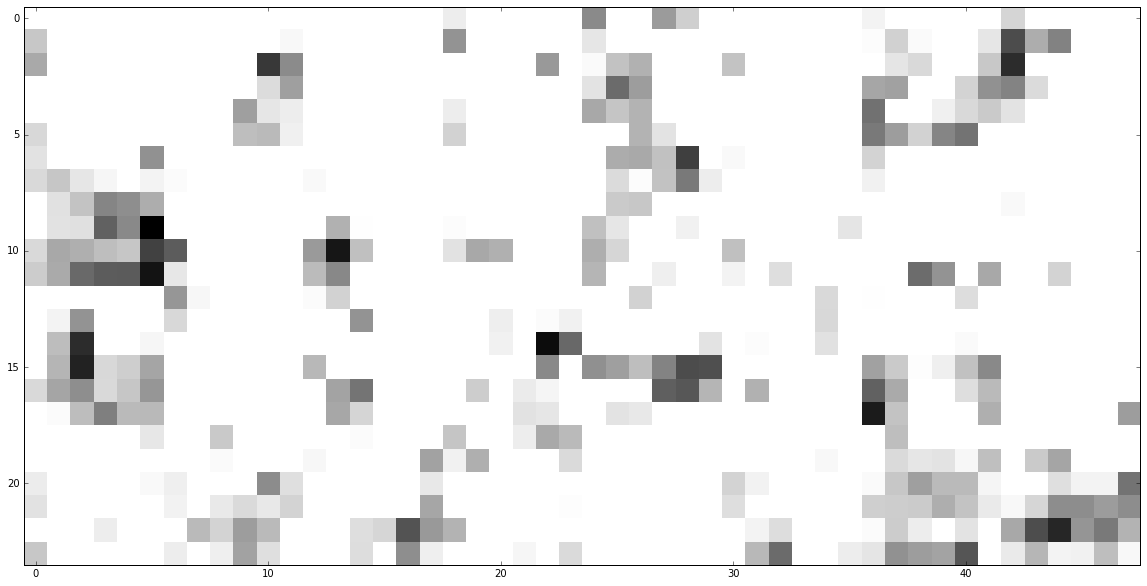

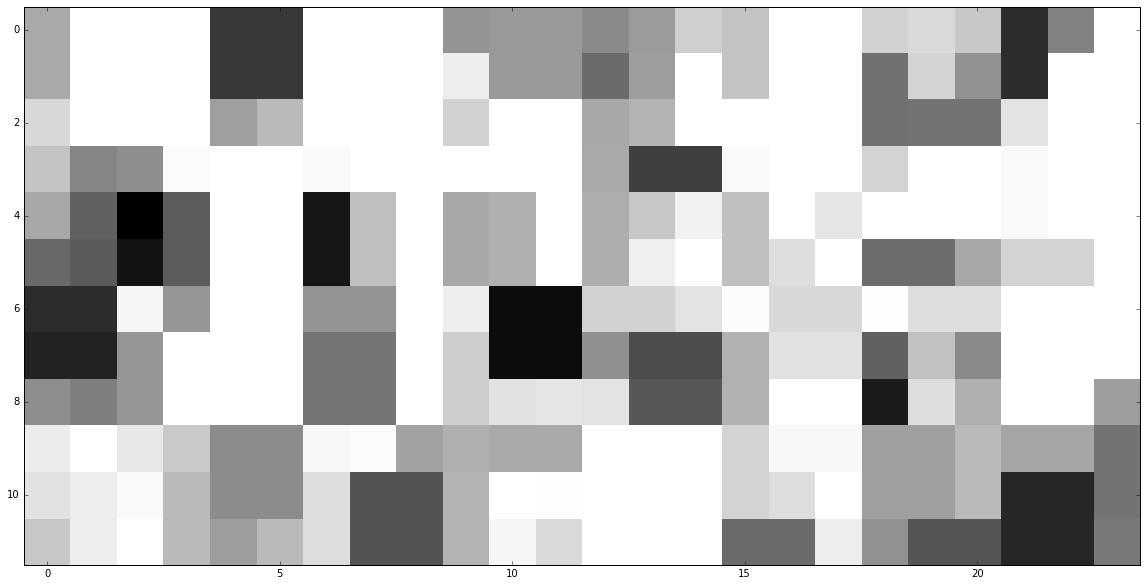

(1, 64)


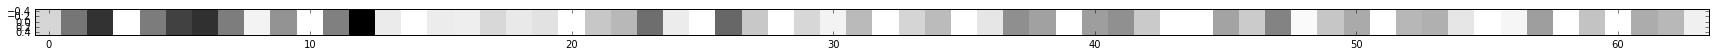

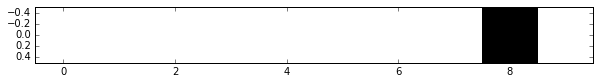

In [73]:
visualize(_X[20])